<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/tugas10_slide1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = {
    "Temperatur": [10, 25, 15, 20, 18, 20, 22, 24],
    "Angin": [0, 0, 5, 3, 7, 10, 5, 6],
    "Persepsi": ["Dingin", "Panas", "Dingin", "Panas", "Dingin", "Dingin", "Panas", "Panas"]
}

In [3]:
df = pd.DataFrame (data)
print("Data Training:\n", df)

Data Training:
    Temperatur  Angin Persepsi
0          10      0   Dingin
1          25      0    Panas
2          15      5   Dingin
3          20      3    Panas
4          18      7   Dingin
5          20     10   Dingin
6          22      5    Panas
7          24      6    Panas


In [4]:
encoder = LabelEncoder()
df["klasifikasi_persepsi_encoded"] = encoder.fit_transform(df["Persepsi"])

X = df[["Temperatur", "Angin"]].values
y = df["klasifikasi_persepsi_encoded"].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

k_candidates = [1, 3, 5]
hasil_k = {}

print("MENGHITUNG K TERBAIK MENGGUNAKAN K-FOLD \n")
for k in k_candidates:
    model = KNeighborsClassifier(n_neighbors=k)
    accuracies = []

# Jalankan K-Fold
for train_index, test_index in kf.split(X_scaled):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

avg_acc = np.mean(accuracies)
hasil_k[k] = avg_acc

print(f"K = {k} | Akurasi Rata-rata = {avg_acc:.3f}")

MENGHITUNG K TERBAIK MENGGUNAKAN K-FOLD 

K = 5 | Akurasi Rata-rata = 0.000


In [7]:
k_terbaik = max(hasil_k, key=hasil_k.get)

print(f"\n K TERBAIK = {k_terbaik} (akurasi = {hasil_k[k_terbaik]:.3f})\n")


 K TERBAIK = 5 (akurasi = 0.000)



In [8]:
model= KNeighborsClassifier(n_neighbors=k_terbaik)
model.fit(X_scaled, y)

KNeighborsClassifier()

In [9]:
semua_pred = []
semua_asli = []

for train_index, test_index in kf.split(X_scaled):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  semua_pred.extend(y_pred)
  semua_asli.extend(y_test)

print("AKURASI TOTAL MODEL (K-FOLD)")
print(f"{accuracy_score(semua_asli, semua_pred):.3f}\n")

print("CLASSIFICATION REPORT")
print(classification_report(semua_asli, semua_pred, target_names=encoder.classes_))

AKURASI TOTAL MODEL (K-FOLD)
0.375

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Dingin       0.00      0.00      0.00         4
       Panas       0.43      0.75      0.55         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8



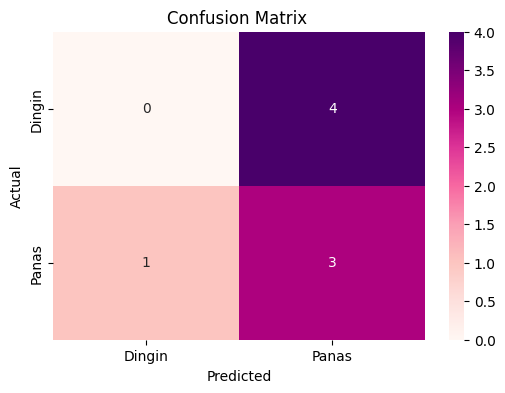

In [10]:
cm = confusion_matrix(semua_asli, semua_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
#contoh data uji latih 1
data_new = np.array([[16, 3]])

# scaling
data_new_scaled = scaler.transform(data_new)

# prediksi
hasil_pred = model.predict(data_new_scaled)[0]

# ubah ke label asli
hasil_label = encoder.inverse_transform([hasil_pred])[0]

print("HASIL PREDIKSI DATA BARU")
print(f"Temperatur 16 derajat & Angin 3 km/h dipersepsikan sebagai: {hasil_label}")

HASIL PREDIKSI DATA BARU
Temperatur 16 derajat & Angin 3 km/h dipersepsikan sebagai: Dingin
